In [39]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score


In [63]:
data=load_breast_cancer()
x=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.DataFrame(data.target,columns=['targate'])


In [41]:
features=pd.DataFrame(data.data,columns=data.feature_names)
targate=pd.DataFrame(data.target,columns=['targate'])

## creating the histogram so we can see the spread of data

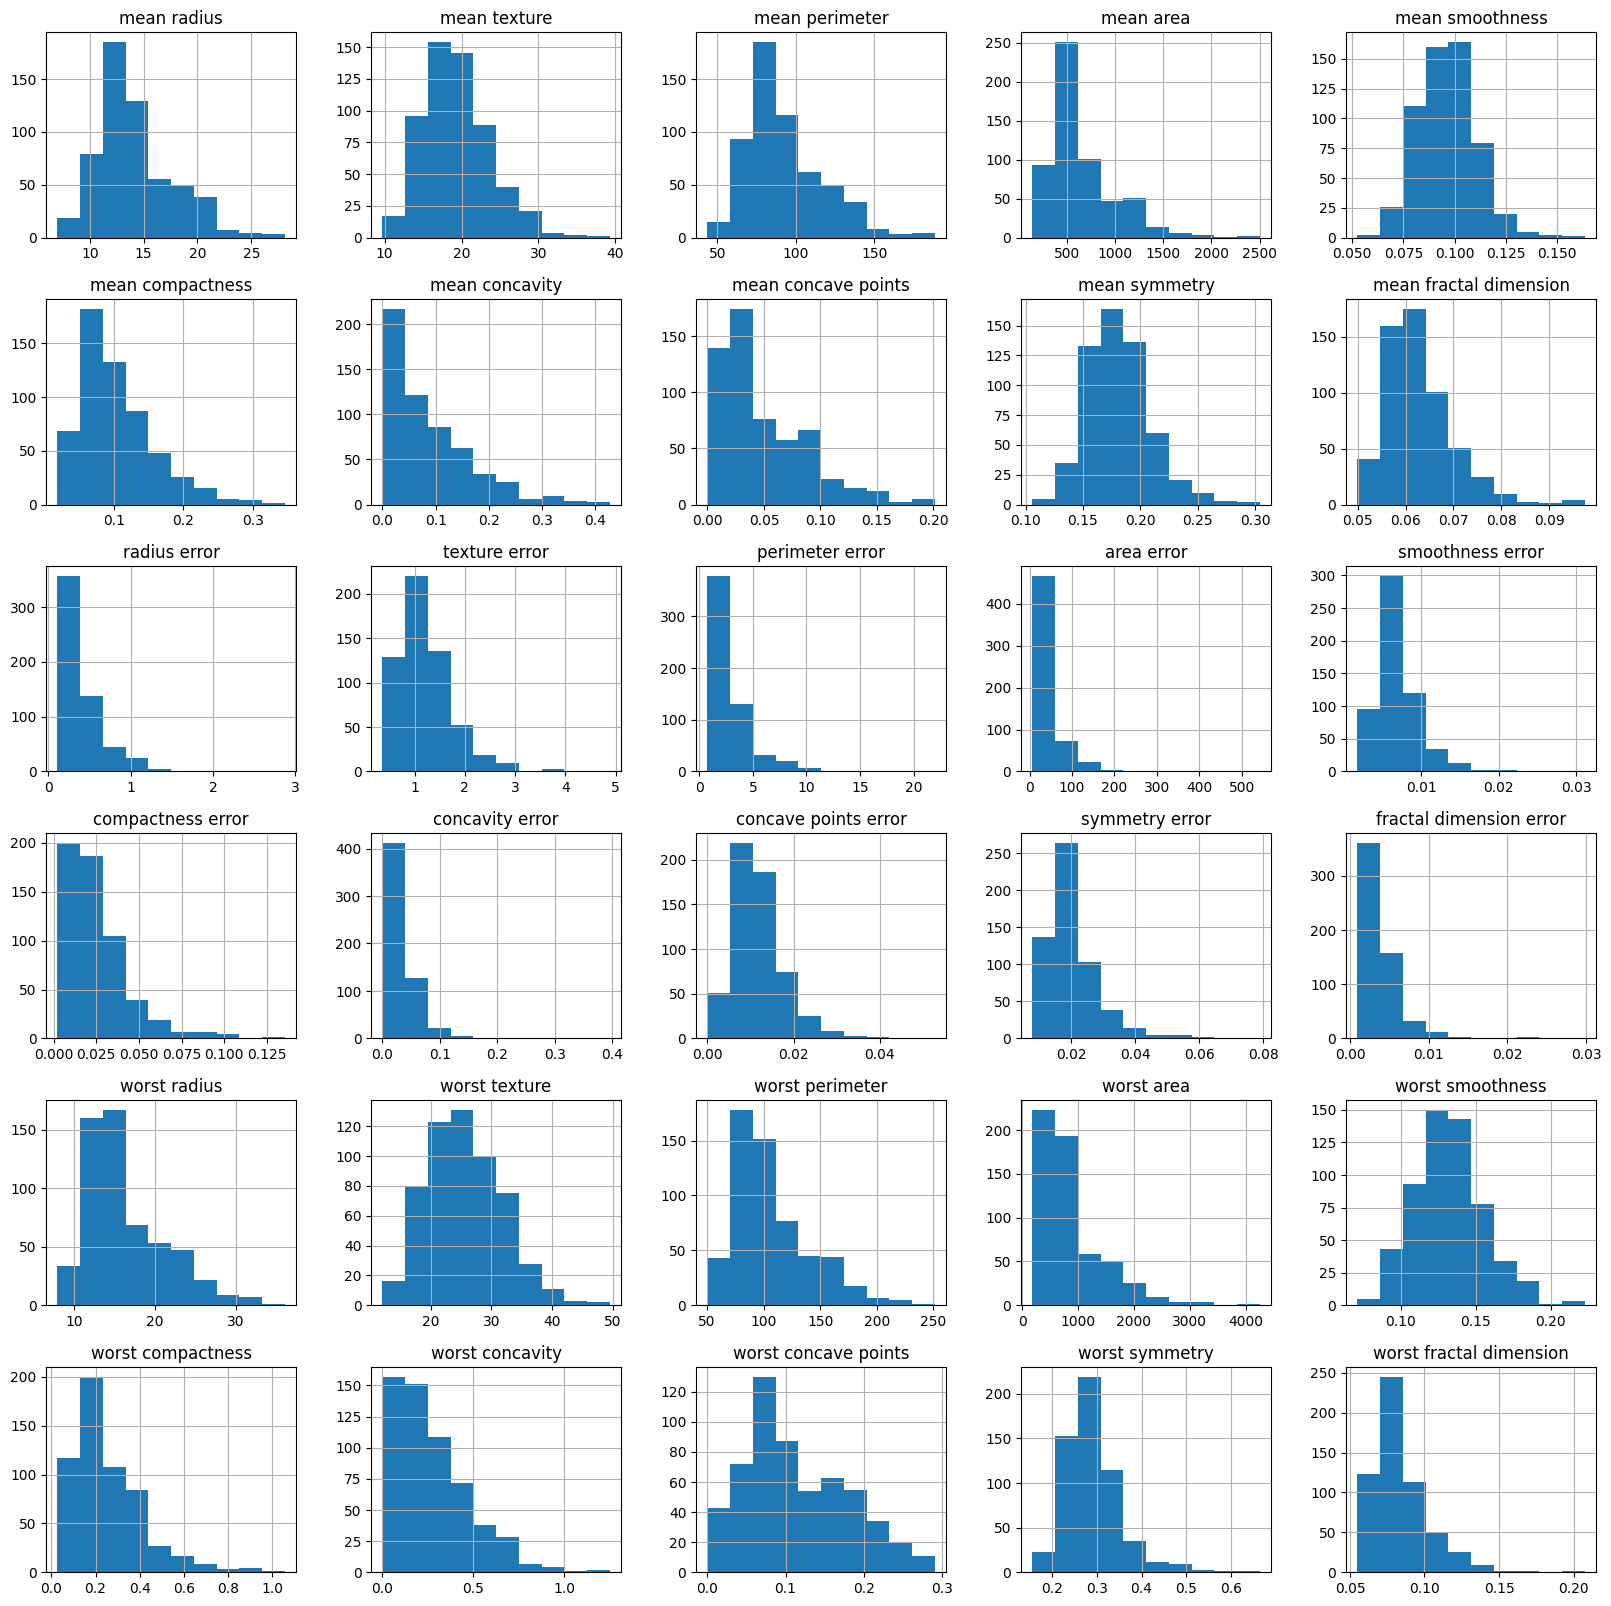

In [42]:
features.hist(bins=10,figsize=(20,20))
plt.show()

# should not be doing this because if we do this then it will scale all data with same varience which we dont want since we want to remove feature with variance threshold


In [43]:
# scaler=StandardScaler()
# features=scaler.fit_transform(features)
# but can use minmaxscaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

In [64]:
variences=x.var(axis=0)
variences

mean radius                    12.418920
mean texture                   18.498909
mean perimeter                590.440480
mean area                  123843.554318
mean smoothness                 0.000198
mean compactness                0.002789
mean concavity                  0.006355
mean concave points             0.001506
mean symmetry                   0.000752
mean fractal dimension          0.000050
radius error                    0.076902
texture error                   0.304316
perimeter error                 4.087896
area error                   2069.431583
smoothness error                0.000009
compactness error               0.000321
concavity error                 0.000911
concave points error            0.000038
symmetry error                  0.000068
fractal dimension error         0.000007
worst radius                   23.360224
worst texture                  37.776483
worst perimeter              1129.130847
worst area                 324167.385102
worst smoothness

### first without deleting anything we will do test

In [65]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=LogisticRegression()
print(X_train.shape)

(455, 30)


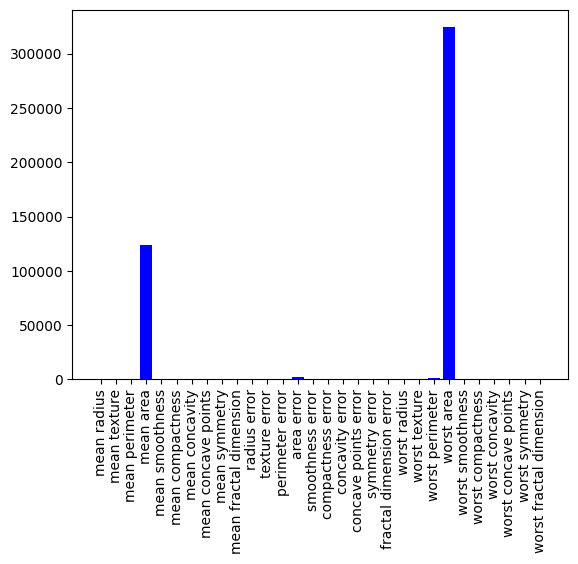

In [68]:
plt.bar(x.columns,variences, color='blue')
plt.xticks(rotation=90)
plt.show()

### 0.955 with all feature 

In [69]:
model.fit(X_train,y_train)
preds=model.predict(X_test)
f1 = round(f1_score(y_test,preds), 3)
print(f1)

0.955


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
scaled_x=scaler.fit_transform(x)
print(scaled_x.shape)

(569, 30)


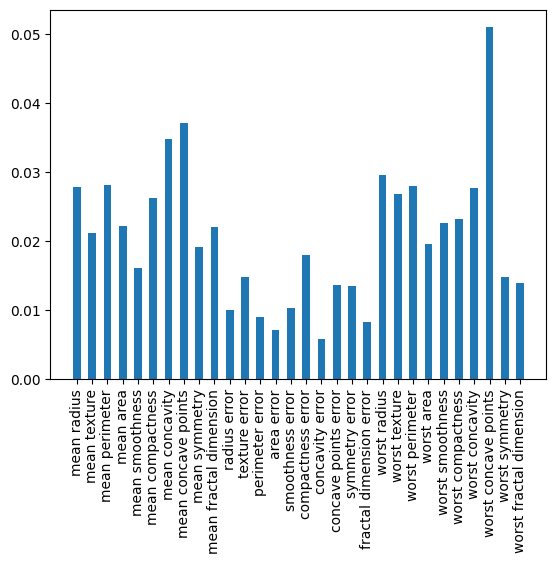

In [85]:
scaled_var=scaled_x.var(axis=0)
plt.bar(x.columns,scaled_var, width=0.5)
plt.xticks(rotation=90)
plt.show()

### this is with variancethreshold 
from sklearn.feature_selection import VarianceThreshold

varienceThreshold=VarianceThreshold(threshold=0.01)
varienceThreshold.fit(scaled_x)
selected_features=varienceThreshold.get_support()
selected_features=X_train.columns[selected_features]

model.fit(X_train[selected_features],y_train)
# model.fit(scaled_x[selected_features],y_train)
preds=model.predict(X_test[selected_features])
f1=round(f1_score(y_test,preds),3)
print(f1)

In [110]:
from sklearn.feature_selection import VarianceThreshold

varienceThreshold=VarianceThreshold(threshold=0.01)
varienceThreshold.fit(scaled_x)
selected_features=varienceThreshold.get_support()
selected_features=X_train.columns[selected_features]

model.fit(X_train[selected_features],y_train)
# model.fit(scaled_x[selected_features],y_train)
preds=model.predict(X_test[selected_features])
f1=round(f1_score(y_test,preds),3)
print(f1)

0.962


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### After droping we are able to get 0.962 f1_score with 26 features

In [111]:
selected_features=x.columns[scaled_var>0.01]
features_to_keep=x[selected_features].columns

var_X_train= X_train[features_to_keep]
var_X_test= X_test[features_to_keep]
model.fit(var_X_train,y_train)
preds=model.predict(var_X_test)
f1 = round(f1_score(y_test,preds), 3)
print(f1)

0.962


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## k best features gives 0.962 f1 score with 17 features

In [101]:
k_X_train,k_X_test,k_y_train,k_y_test=X_train.copy(),X_test.copy(),y_train.copy(),y_test.copy()

In [112]:
from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif

In [ ]:
scores=[]
for k in range (1,31):
    selector=SelectKBest(f_classif,k=k);
    selector.fit(k_X_train,k_y_train)

    sel_x_train=selector.transform(k_X_train)
    sel_x_test=selector.transform(k_X_test)
    
    model.fit(sel_x_train,k_y_train)
    preds=model.predict(sel_x_test)
    f1=round(f1_score(k_y_test,preds),3)
    scores.append(f1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

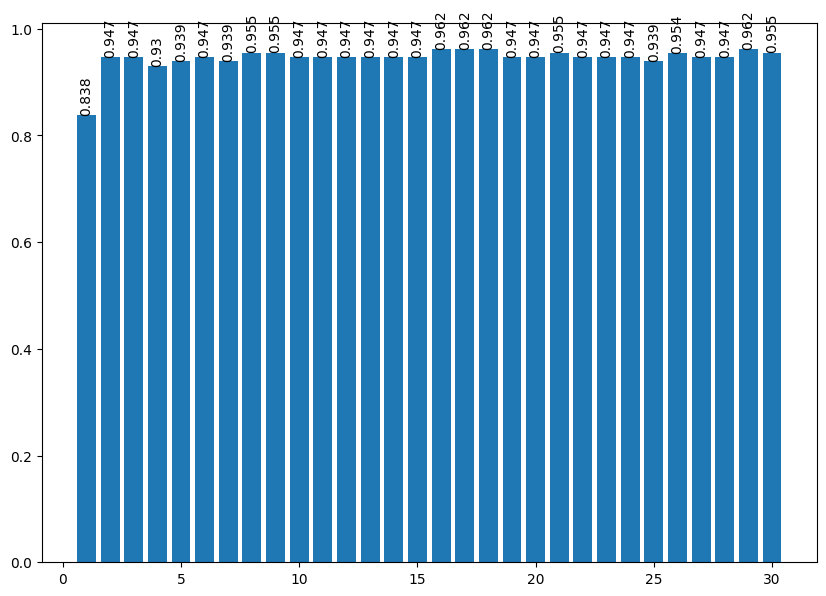

In [125]:
plt.figure(figsize=(10, 7))
bars=plt.bar(range(1,31),scores)
for bar in bars:
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval,3),ha='center',va='bottom',rotation=90)
plt.show()


In [124]:
mscores=[]
for k in range (1,31):
    selector=SelectKBest(mutual_info_classif,k=k);
    selector.fit(k_X_train,k_y_train)

    sel_x_train=selector.transform(k_X_train)
    sel_x_test=selector.transform(k_X_test)
    
    model.fit(sel_x_train,k_y_train)
    preds=model.predict(sel_x_test)
    f1=round(f1_score(k_y_test,preds),3)
    mscores.append(f1)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

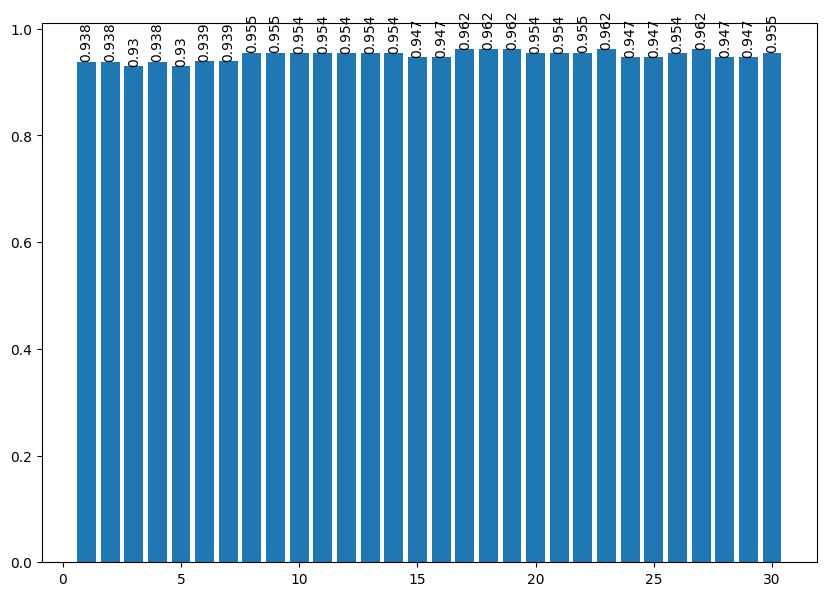

In [123]:
plt.figure(figsize=(10, 7))
bars = plt.bar(range(1, 31), mscores)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', rotation=90)
plt.show()

In [134]:
selector=SelectKBest(f_classif,k=17)
selector.fit(k_X_train,k_y_train)
selected_features=selector.get_support()
selected_features=k_X_train.columns[selected_features]
selected_features 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['mean radius', 'mean perimeter', 'mean area', 'mean compactness',
       'mean concavity', 'mean concave points', 'radius error',
       'perimeter error', 'area error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points'],
      dtype='object')

## RFE method we get 0.97 f1 score with 17 features

In [129]:
r_X_train,r_X_test,r_y_train,r_y_test=X_train.copy(),X_test.copy(),y_train.copy(),y_test.copy()

In [130]:
from sklearn.feature_selection import RFE

In [131]:
r_scores=[]
for i in range(1,31):
    rfe_selector = RFE(estimator=model, n_features_to_select=i)
    rfe_selector.fit(r_X_train, r_y_train);
    
    rfe_x_train = rfe_selector.transform(r_X_train)
    rfe_x_test = rfe_selector.transform(r_X_test)
    
    model.fit(rfe_x_train, r_y_train)
    preds=model.predict(rfe_x_test)
    f1=round(f1_score(r_y_test,preds),3)
    r_scores.append(f1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-

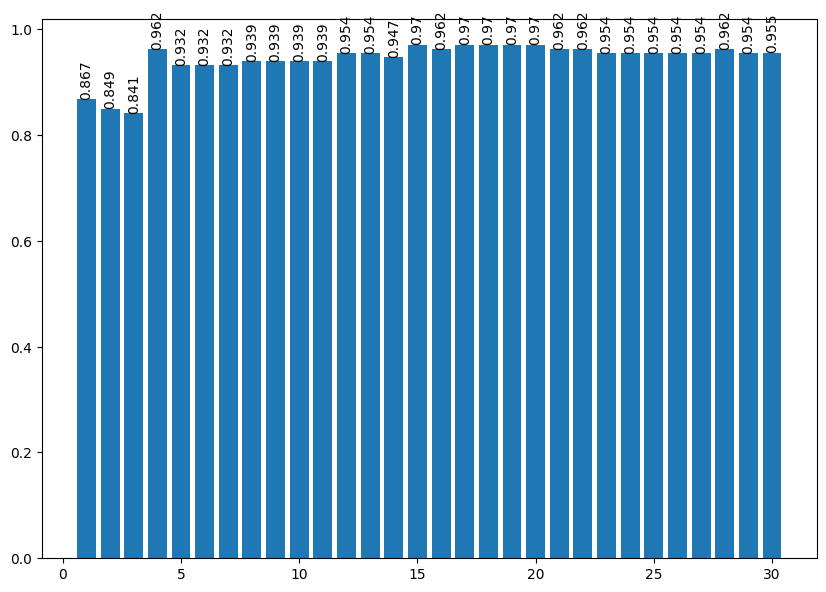

In [132]:
plt.figure(figsize=(10, 7))
bars = plt.bar(range(1, 31), r_scores)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', rotation=90)
plt.show()

In [135]:
rfe_selector = RFE(estimator=model, n_features_to_select=17)
rfe_selector.fit(r_X_train, r_y_train)
r_selected_features = r_X_train.columns[rfe_selector.support_]
r_selected_features

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-

Index(['mean radius', 'mean smoothness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'radius error', 'texture error',
       'compactness error', 'concavity error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')

## boruta 

In [140]:
from boruta import BorutaPy

In [ ]:
b_selector=BorutaPy(estimator=model,random_state=42)
b_selector.fit(X_train.values,y_train.values.ravel(),)

b_x_train=b_selector.transform(X_train.values)
b_x_test=b_selector.transform(X_test.values)
 
model.fit(b_x_train,y_train)
preds=model.predict(b_x_test)

f1=round(f1_score(y_test,preds),3)
print(f1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/boruta/boruta_py.py:460: UserWarning: The estimator does not have a max_depth property, as a result  the number of trees to use cannot be estimated automatically.
  warnings.warn(


ValueError: Invalid parameter 'n_estimators' for estimator LogisticRegression(). Valid parameters are: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'].